In [27]:
import sys
sys.path.append('../')
sys.path.append('../rlkit_master/')

import pickle
from rlkit_master.rlkit.samplers.rollout_functions import rollout
from rlkit_master.rlkit.envs.wrappers import NormalizedBoxEnv
import torch

from gym.envs.mujoco import HalfCheetahEnv

from bokeh.plotting import figure, show, output_file
from bokeh.plotting import output_notebook
from bokeh.palettes import d3
import bokeh.models as bmo
output_notebook()

import matplotlib.pyplot as plt
# import seaborn as sns

from scipy.fftpack import fft, fftfreq, fftshift
from skimage import util
import numpy as np

Loading BokehJS ...

In [3]:
# pip install bokeh

In [4]:
eval_env = NormalizedBoxEnv(HalfCheetahEnv())

In [5]:
# with open('../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_21_15_29_55_0000--s-0/itr_0.pkl', 'rb') as f:
#     agent = pickle.load(f)

In [92]:
agent = torch.load('../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/itr_2999.pkl')

In [93]:
agent = agent['trainer/policy']

In [94]:
rollout_dict = rollout(
        env = eval_env ,
        agent = agent,
        max_path_length=1000,
        render=False,
        render_kwargs=None,
)

In [113]:
act_num = 4

In [114]:
rollout_dict['actions'][:,act_num].shape

(1000,)

In [115]:
M = int(10*8)
slices = util.view_as_windows(rollout_dict['actions'][:,act_num], window_shape=(M,), step=6)
slices.shape

(154, 80)

In [116]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

In [117]:
spectrum = np.fft.fft(slices.T, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)
spectrum.shape

(38, 154)

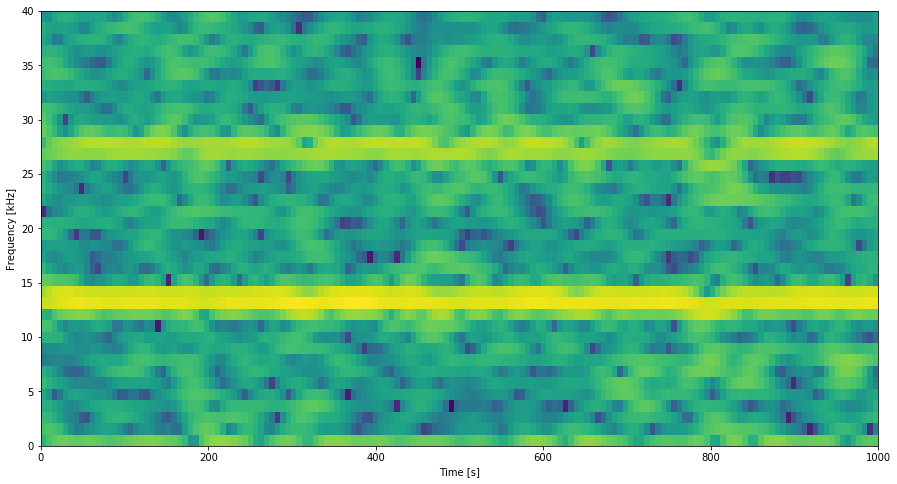

In [118]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

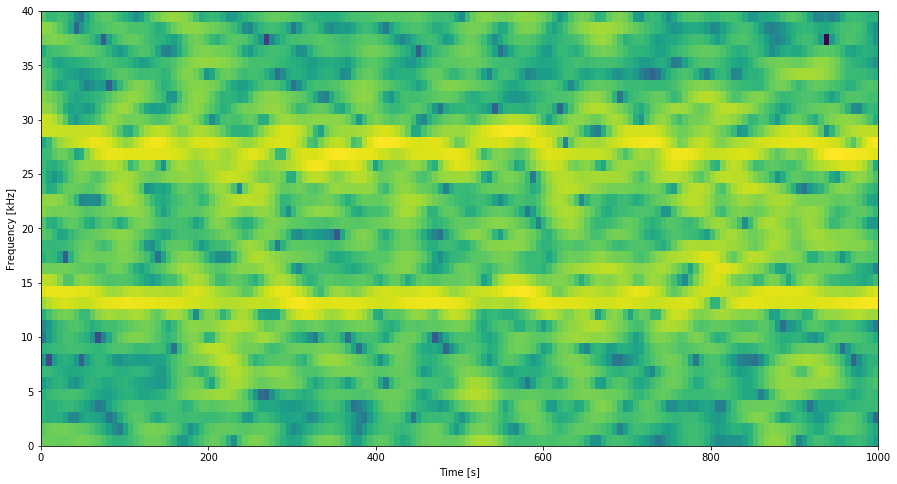

In [91]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

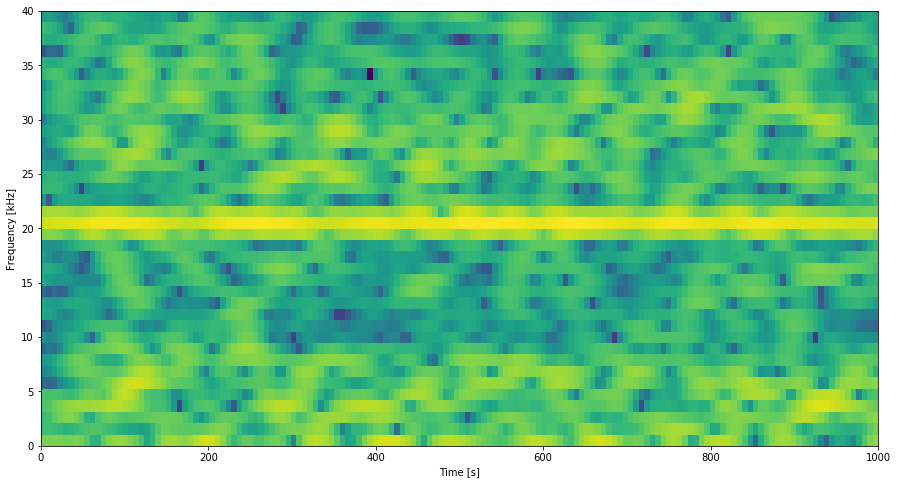

In [82]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

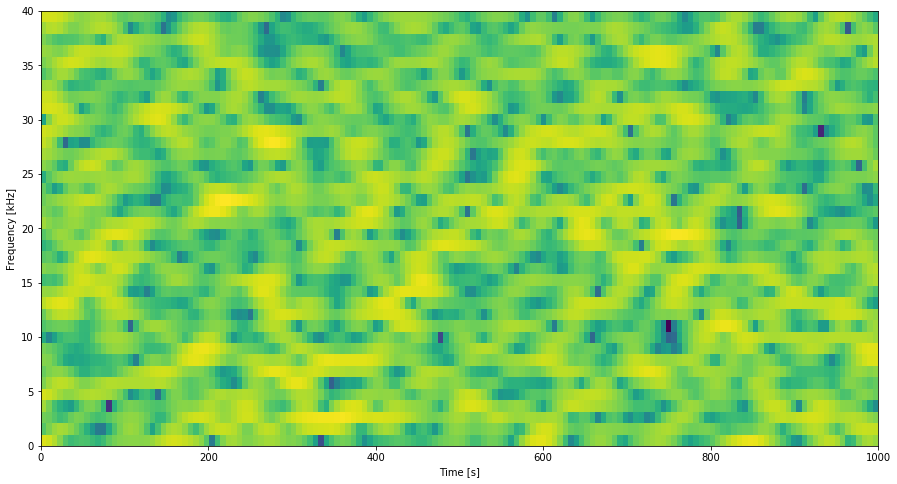

In [73]:
f, ax = plt.subplots(figsize=(15, 8))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, rollout_dict['actions'].shape[0], 0, 40))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [ ]:
def get_snapshot(self):
        return dict(
            policy=self.policy,
            qf1=self.qf1,
            qf2=self.qf2,
            target_qf1=self.qf1,
            target_qf2=self.qf2,
        )